# Diamonds data set EDA



In [1]:
# imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load dataset
df = pd.read_csv('../input/diamond-prices/diamonds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [3]:
# type conversion
df['date'] = pd.to_datetime(df['date'])

# check missing values
df.isnull().sum()

diamond_id                          0
shape                               0
size                                0
color                            9162
fancy_color_dominant_color     210540
fancy_color_secondary_color    218642
fancy_color_overtone           217666
fancy_color_intensity          210542
clarity                             0
cut                             60607
symmetry                            0
polish                              0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      83433
girdle_max                      84296
culet_size                      85741
culet_condition                204385
fluor_color                    203978
fluor_intensity                   128
lab                                 0
total_sales_price                   0
eye_clean                      156917
date        

# Univariate analysis

### A. Catagorical variables

This section is basically doing some value counts to show the common values for each categorical variable (e.g.  shape, color, etc.)

In [4]:
# 1. shape value counts
df['shape'].value_counts(dropna = False)

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2917
Asscher               1696
Cushion                529
Name: shape, dtype: int64

In [5]:
# 2. colors value counts
df['color'].value_counts(dropna = False)

E      33103
F      31566
D      30873
G      29184
H      26073
I      22364
J      16898
K      11750
NaN     9162
L       5683
M       3048
Name: color, dtype: int64

In [6]:
# 3. Clarity
df['clarity'].value_counts(dropna = False)

SI1     38628
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [7]:
# 4. cut
df['cut'].value_counts(dropna = False)

Excellent    124861
NaN           60607
Very Good     34201
Good             28
Fair              5
None              1
Ideal             1
Name: cut, dtype: int64

In [8]:
# 5. symmetry
df['symmetry'].value_counts(dropna = False)

Excellent    131619
Very Good     83144
Good           4609
Fair            325
Poor              7
Name: symmetry, dtype: int64

In [9]:
# 6. polish
df['polish'].value_counts(dropna = False)

Excellent    175806
Very Good     42324
Good           1565
Fair              7
Poor              2
Name: polish, dtype: int64

In [10]:
# todo: we can also look at the remaining ones, but they might not as important as the above ones
# girdle_min, girdle_max, culet_size, culet_condition, fluor_color, fluor_intensity

### B. Continous variables

This section inspects continous variables

In [11]:
# descrive stats of continous variables (show min, max, median (50% percentile), std, etc.)
# we can get a lot of information from the table below, ex:
# the mean size ranges from 0.08 caret to 19.35 caret, with mean 0.75 and median 0.5 caret
# the total sales price ranges from $200 to $1.45 Million dollars!
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diamond_id,219704.0,1.281166e+08,1.320737e+07,9666855.00,1.275641e+08,1.326076e+08,1.348523e+08,1.361475e+08
size,219704.0,7.551760e-01,8.458924e-01,0.08,3.100000e-01,5.000000e-01,1.000000e+00,1.935000e+01
depth_percent,219704.0,6.168379e+01,9.915251e+00,0.00,6.120000e+01,6.240000e+01,6.350000e+01,9.870000e+01
table_percent,219704.0,5.774758e+01,9.959906e+00,0.00,5.700000e+01,5.800000e+01,6.000000e+01,9.400000e+01
meas_length,219704.0,5.548867e+00,1.763932e+00,0.00,4.350000e+00,5.060000e+00,6.350000e+00,9.366000e+01
meas_width,219704.0,5.135623e+00,1.374527e+00,0.00,4.310000e+00,4.800000e+00,5.700000e+00,6.230000e+01
meas_depth,219704.0,3.285698e+00,2.054817e+00,0.00,2.680000e+00,3.030000e+00,3.630000e+00,7.630000e+01
total_sales_price,219704.0,6.908035e+03,2.595944e+04,200.00,9.580000e+02,1.970000e+03,5.207000e+03,1.449881e+06


array([<AxesSubplot:title={'center':'size'}>], dtype=object)

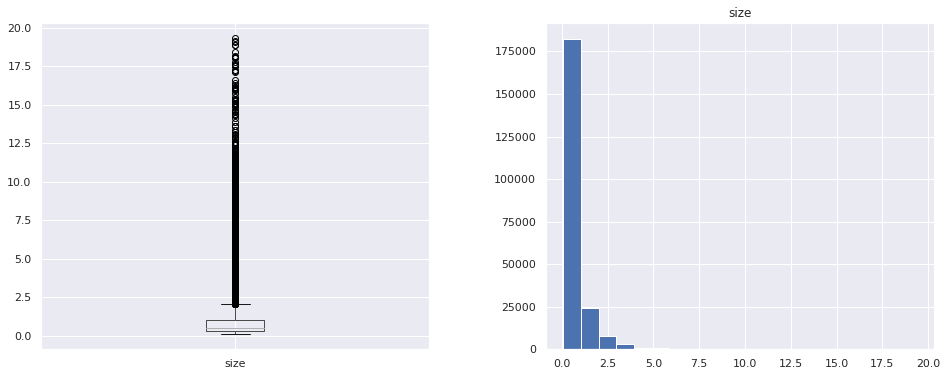

In [12]:
# 1. size (box plot + histogram of the size)
fig,axs = plt.subplots(1, 2, figsize=(16,6))
df[['size']].boxplot(ax = axs[0])
df[['size']].hist(bins = 20, ax = axs[1])

<Figure size 1008x864 with 0 Axes>

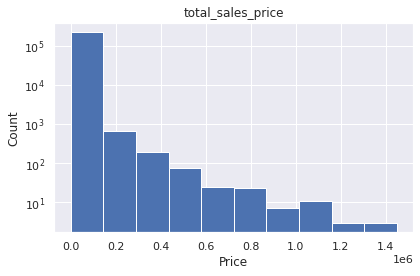

In [13]:
# 2. price (log scale)
fig = plt.figure(figsize=(14,12))
df[['total_sales_price']].hist()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
fig.suptitle('Distribution of the total sale price on the log scale')
plt.tight_layout()

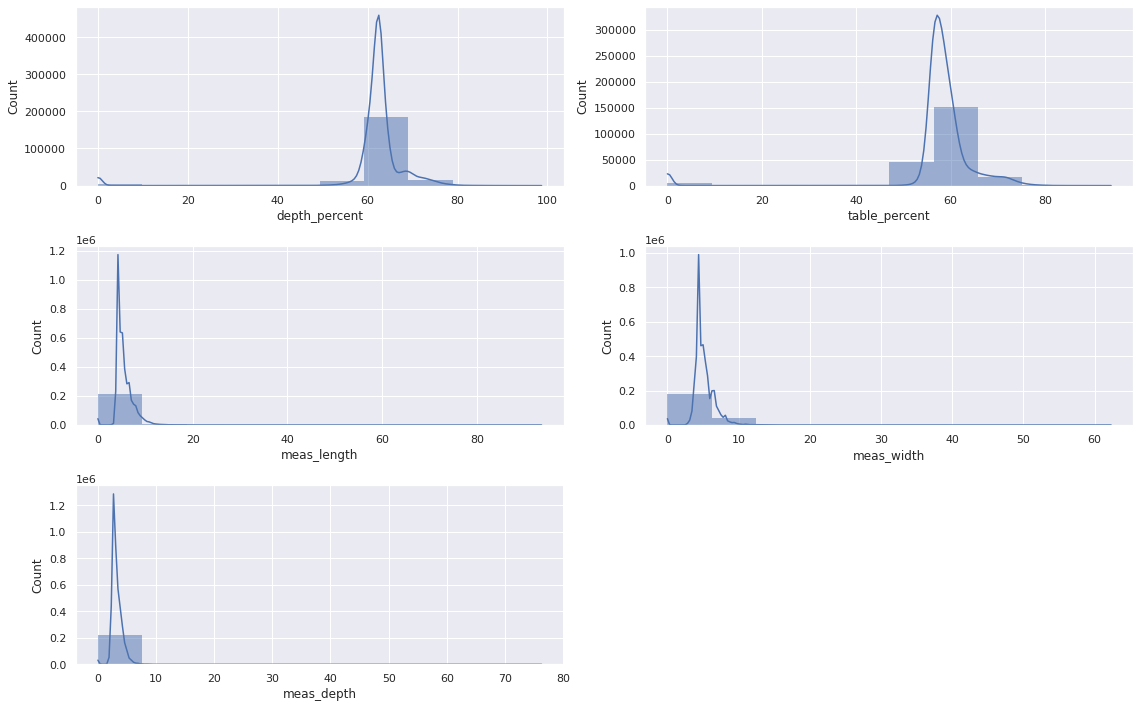

In [14]:
# 3. depth_percent, table_percent, meas_length, meas_width, meas_depth
fig,axs = plt.subplots(3, 2, figsize=(16,10))
sns.histplot(df['depth_percent'], kde=True, stat="count", linewidth=0, bins=10, ax=axs[0,0])
sns.histplot(df['table_percent'], kde=True, stat="count", linewidth=0, bins=10, ax=axs[0,1])
sns.histplot(df['meas_length'], kde=True, stat="count", linewidth=0, bins=10, ax=axs[1,0])
sns.histplot(df['meas_width'], kde=True, stat="count",  linewidth=0, bins=10, ax=axs[1,1])
sns.histplot(df['meas_depth'], kde=True, stat="count",  linewidth=0, bins=10, ax=axs[2,0])
axs[2,1].axis('off')
fig.tight_layout()

# Bivariate / Multivariate Analysis


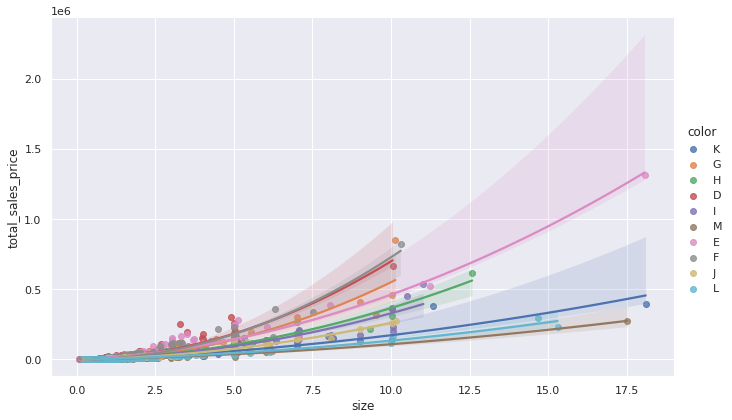

In [15]:
# size vs price by colour
sns.lmplot(x='size', y='total_sales_price', hue='color', data=df.sample(20000), order=2, height=6, aspect=1.6)

<AxesSubplot:xlabel='log_price_by_size', ylabel='clarity'>

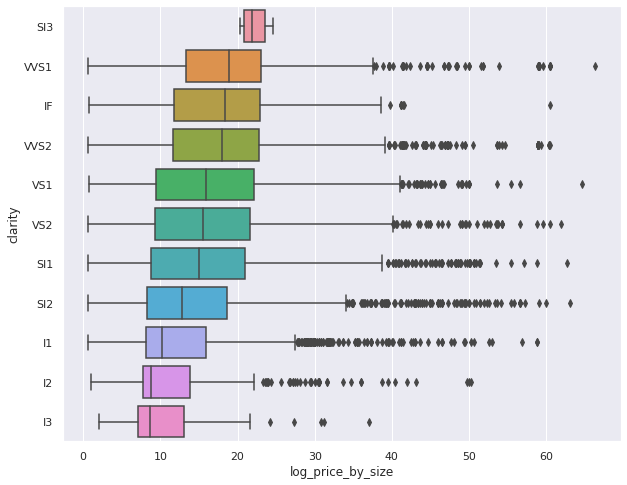

In [16]:
# clarity vs log(price) per size
fig = plt.figure(figsize=(10,8))
df ['log_price'] = np.log(df['total_sales_price'])
df ['log_price_by_size'] = df ['log_price']  / df ['size']
sorted_index = df[['clarity', 'log_price_by_size']].groupby('clarity').median().sort_values(by='log_price_by_size', ascending=False).index
sns.boxplot(x='log_price_by_size', y= 'clarity', data=df, order=sorted_index)

<AxesSubplot:xlabel='log_price_by_size', ylabel='color'>

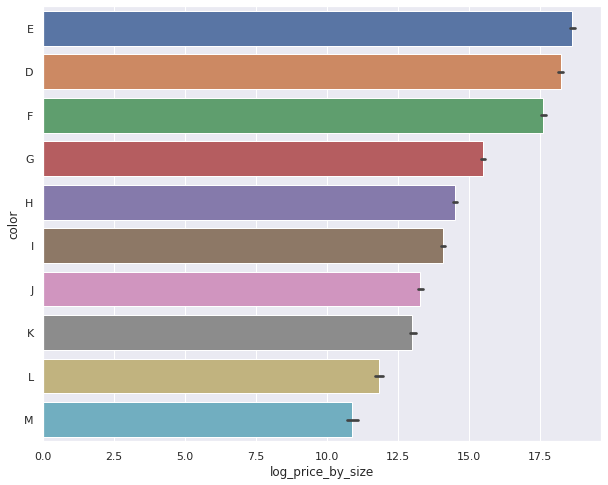

In [17]:
# color vs log(price) per size
fig = plt.figure(figsize=(10,8))
sorted_index = df[['color', 'log_price_by_size']].groupby('color').mean().sort_values(by='log_price_by_size', ascending=False).index
sns.barplot(x='log_price_by_size', y= 'color', data=df, order=sorted_index)

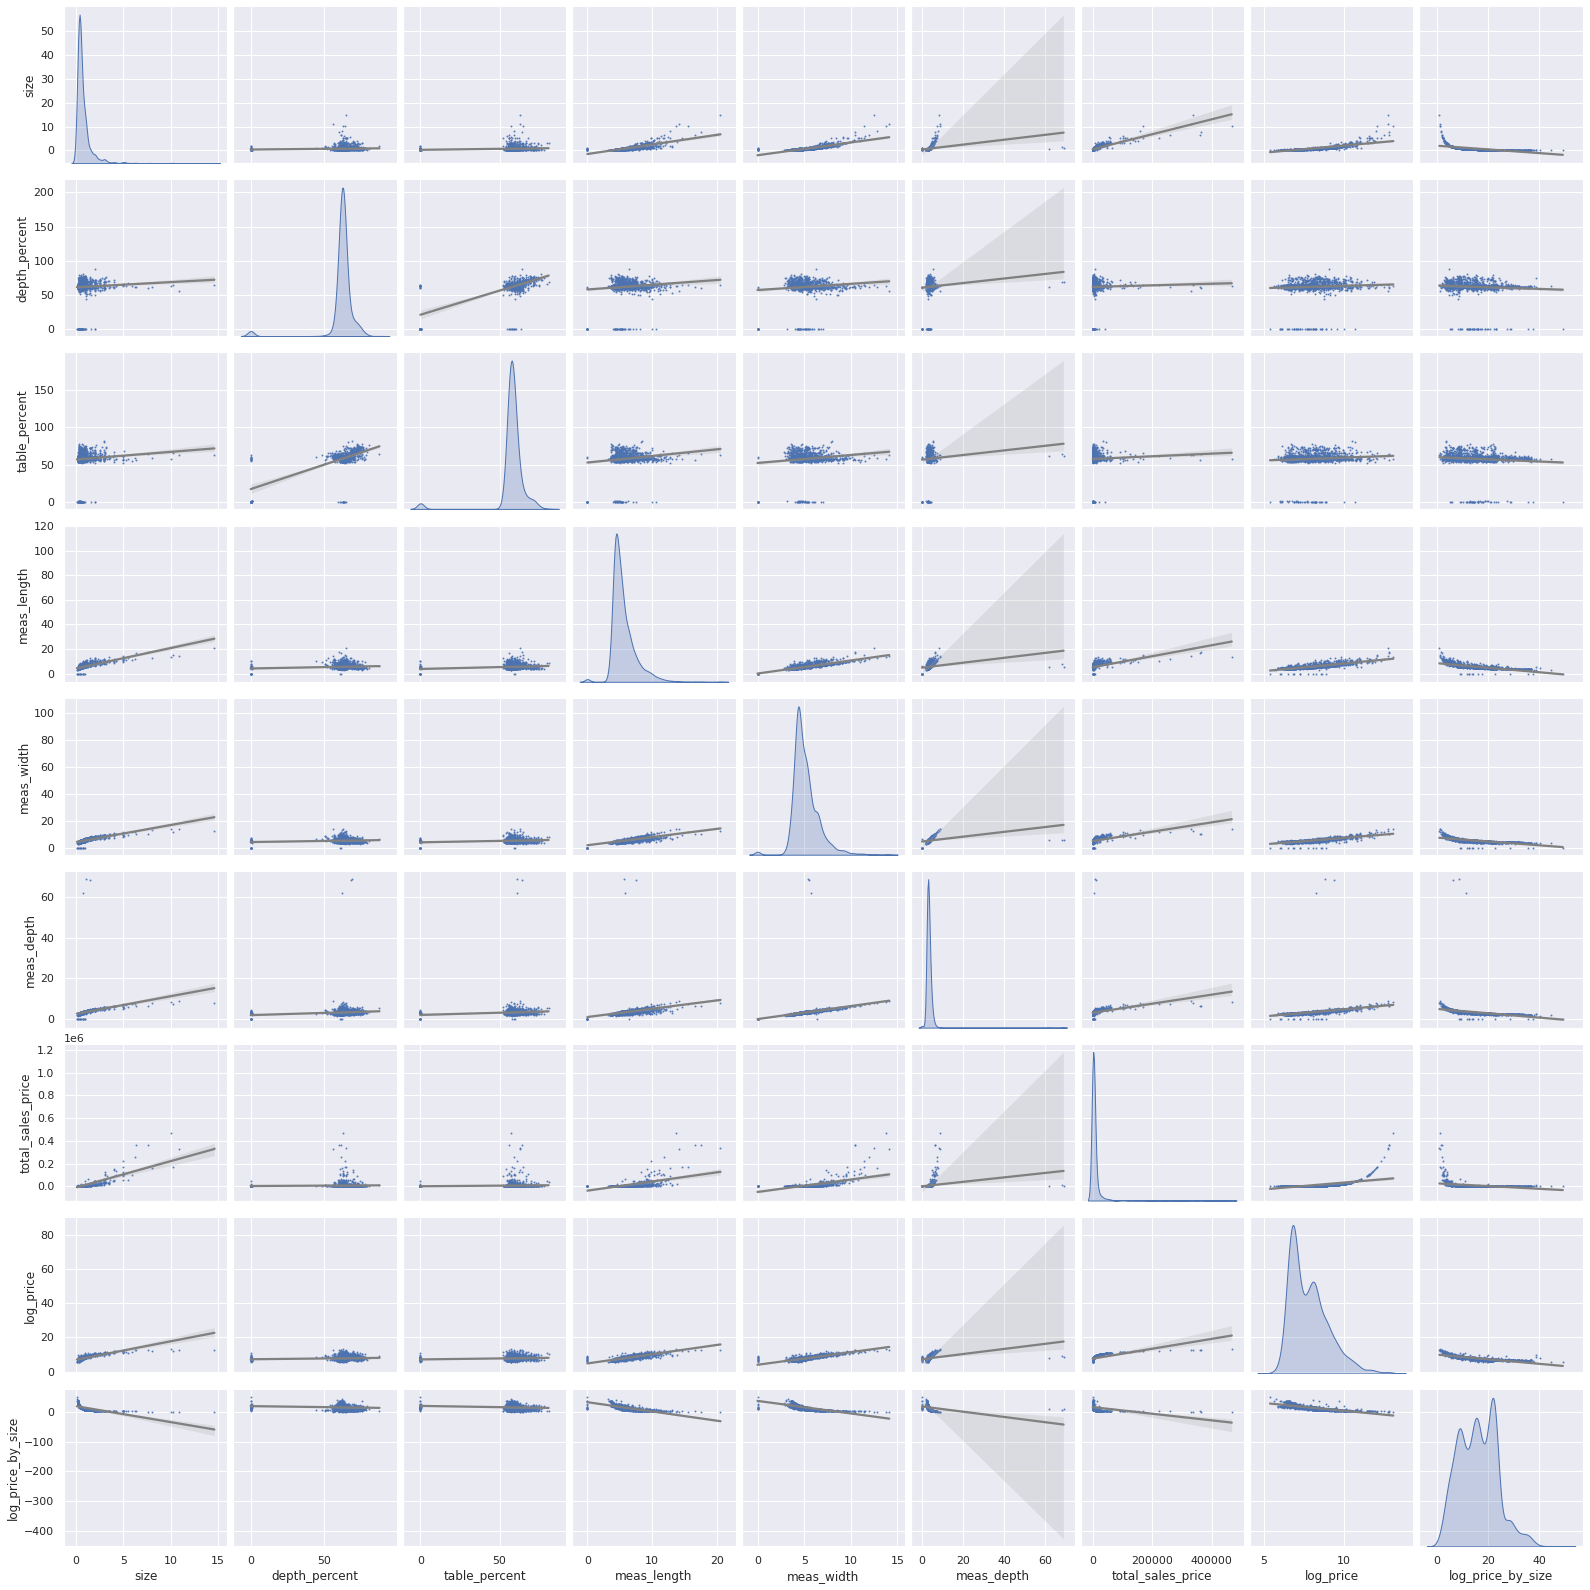

In [18]:
# pair plot for numeric variables
numbers_df = df[df.select_dtypes(include=np.number).columns[1:]].sample(2000)
sns.pairplot(numbers_df, diag_kind='kde', kind='reg',
             plot_kws = {'scatter_kws': {'s':1 }, 'line_kws' : {'color' : 'grey'} })

<AxesSubplot:>

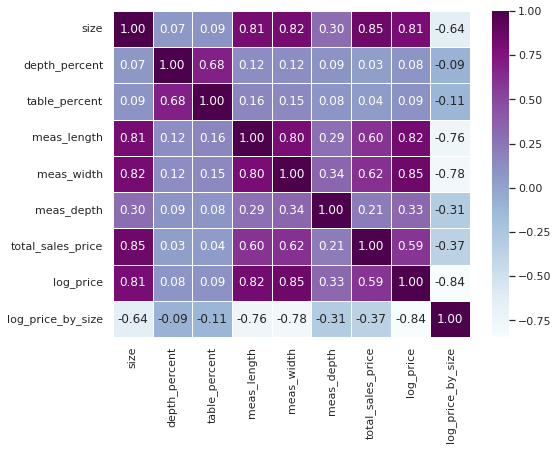

In [19]:
# showing the correlation matrix between all the variables
plt.figure(figsize=(8,6))
sns.heatmap(data= numbers_df.corr(), annot = True, fmt='.2f', linewidths=.5, cmap='BuPu')

# Dummy variables 


In [20]:
# feature matrix (aka. predictors)
X = pd.concat([
  df[['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']], 
  pd.get_dummies(df['shape'], drop_first=True, prefix='shape'),
  pd.get_dummies(df['color'], drop_first=True, prefix='color'),
  pd.get_dummies(df['clarity'], drop_first=True, prefix='clarity'),
  pd.get_dummies(df['cut'], drop_first=True, prefix='cut'),
  pd.get_dummies(df['symmetry'], drop_first=True, prefix='symmetry'),
  pd.get_dummies(df['polish'], drop_first=True, prefix='polish'),
  pd.get_dummies(df['culet_size'], drop_first=True, prefix='culet_size'),
  pd.get_dummies(df['culet_condition'], drop_first=True, prefix='culet_condition'),
], axis=1)

# target vector
y = df['total_sales_price']

# drop non-important features
X = X.drop(columns=['cut_Ideal', 'culet_size_S', 'culet_size_VL', 'cut_None', 'polish_Fair',
                   'culet_condition_Chipped', 'clarity_SI2', 'culet_size_M', 'cut_Fair'])

# Feature importance (OLS method)

In [21]:
import statsmodels.api as sm
ols_model=sm.OLS(y, X)
result=ols_model.fit()
print(result.summary2())

                           Results: Ordinary least squares
Model:                   OLS                Adj. R-squared (uncentered):  0.641       
Dependent Variable:      total_sales_price  AIC:                          4880040.3178
Date:                    2022-03-10 00:19   BIC:                          4880534.7195
No. Observations:        219704             Log-Likelihood:               -2.4400e+06 
Df Model:                48                 F-statistic:                  8158.       
Df Residuals:            219656             Prob (F-statistic):           0.00        
R-squared (uncentered):  0.641              Scale:                        2.5938e+08  
--------------------------------------------------------------------------------------
                           Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------------------
size                     33132.1110    79.3591 417.4959 0.0000  32976.5